In [100]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import psycopg2

%matplotlib inline

In [3]:
# Extract all daily digital currency data from SQL database:
def all_assts_from_sql(asst1, asst2, asst3, asst4, asst5, asst6, asst7, asst8, sql_limit_num, location, till_date):
    conn = psycopg2.connect(database="bitmexdata", user="postgres", password="tongKen123", host="128.199.97.202", port="5432")
    asset1 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst1, sql_limit_num)
    asset2 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst2, sql_limit_num)
    asset3 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst3, sql_limit_num)
    asset4 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst4, sql_limit_num)
    asset5 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst5, sql_limit_num)
    asset6 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst6, sql_limit_num)
    asset7 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst7, sql_limit_num)
    asset8 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst8, sql_limit_num)
    df1 = pd.read_sql(asset1, con=conn)
    df2 = pd.read_sql(asset2, con=conn)
    df3 = pd.read_sql(asset3, con=conn)
    df4 = pd.read_sql(asset4, con=conn)
    df5 = pd.read_sql(asset5, con=conn)
    df6 = pd.read_sql(asset6, con=conn)
    df7 = pd.read_sql(asset7, con=conn)
    df8 = pd.read_sql(asset8, con=conn)
    conn.close()
#     return df1, df2, df3, df4, df5, df6, df7, df8
    df1.to_csv(location+"{}".format(till_date)+asst1+".csv", index = False)
    df2.to_csv(location+"{}".format(till_date)+asst2+".csv", index = False)
    df3.to_csv(location+"{}".format(till_date)+asst3+".csv", index = False)
    df4.to_csv(location+"{}".format(till_date)+asst4+".csv", index = False)
    df5.to_csv(location+"{}".format(till_date)+asst5+".csv", index = False)
    df6.to_csv(location+"{}".format(till_date)+asst6+".csv", index = False)
    df7.to_csv(location+"{}".format(till_date)+asst7+".csv", index = False)
    df8.to_csv(location+"{}".format(till_date)+asst8+".csv", index = False)


In [4]:
# standardize and reset the price:
# file_suffix example: 'z18_1d.csv'
# added_note example: 'u18z18乘'
# till_date example: '11_10_' 
def reset_price(location, till_date, file_suffix, added_note):

    symlist = ['ada', 'bch', 'eth', 'eos', 'trx', 'xrp', 'ltc']

    for s in symlist:
        if s == 'ada':
            c = 10000000
        elif s == 'bch':
            c = 1000
        elif s == 'eos':
            c = 100000
        elif s == 'eth' or s == 'ltc':
            c = 10000
        elif s == 'trx':
            c = 100000000
        elif s == 'xrp':
            c = 10000000

#         b = pd.read_csv(location + till_date + s + file_suffix,header=None)
        b = pd.read_csv(location + "{}".format(till_date) + s + file_suffix + ".csv")
        b.iloc[:, [1, 2, 3, 4]] = b.iloc[:, [1, 2, 3, 4]].astype(float)
        b.iloc[:, [1, 2, 3, 4]] = (b.iloc[:, [1, 2, 3, 4]]) * c
        b.to_csv(location + 'res_' + till_date + s + added_note + str(c) + '.csv', sep=',', header=False, index=False, float_format='%.2f')

In [5]:
location = "C:/Users/workspace/brad_public_workspace_on_win/SH_tongliang/data/extracing_and_transforming_data/"
till_date = "11_10_"
file_suffix = 'u18z18_1d'
added_note = 'u18z18乘'

In [6]:
all_assts_from_sql("adau18z18_1d", "bchu18z18_1d", "eosu18z18_1d", 
                   "ethu18z18_1d", "ltcu18z18_1d", "trxu18z18_1d", 
                   "xbtusd_1d", "xrpu18z18_1d", 200,
                   "C:/Users/workspace/brad_public_workspace_on_win/SH_tongliang/data/extracing_and_transforming_data/",
                   "11_10_")

reset_price(location, till_date, file_suffix, added_note)

# 不需要每次都执行上面一遍代码，从这里直接导出结果

In [8]:
def calc_close_pct_chg(df):
    df['pct_chg'] = df['close'].pct_change()
    return df

# The start/end_date format is like "2018/09/22"
def peek(df, start_date, end_date):
    df_ = df[(df['time']>=start_date) & (df['time'] <= end_date)]
    print (start_date, "to", end_date)
    return df_

root_2 = "C:/Users/workspace/brad_public_workspace_on_win/SH_tongliang/data/extracing_and_transforming_data/"
file1 = "res_11_10_adau18z18乘10000000.csv"
file2 = "res_11_10_bchu18z18乘1000.csv"
file3 = "11_10_xbtusd_1d.csv"
file4 = "res_11_10_eosu18z18乘100000.csv"
file5 = "res_11_10_ethu18z18乘10000.csv"
file6 = "res_11_10_ltcu18z18乘10000.csv"
file7 = "res_11_10_trxu18z18乘100000000.csv"
file8 = "res_11_10_xrpu18z18乘10000000.csv"


ada = pd.read_csv(root_2+file1, engine='python', header=None)
bch = pd.read_csv(root_2+file2, engine='python', header=None)
btc = pd.read_csv(root_2+file3, engine='python')
eos = pd.read_csv(root_2+file4, engine='python', header=None)
eth = pd.read_csv(root_2+file5, engine='python', header=None)
ltc = pd.read_csv(root_2+file6, engine='python', header=None)
trx = pd.read_csv(root_2+file7, engine='python', header=None)
xrp = pd.read_csv(root_2+file8, engine='python', header=None)

ada.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
bch.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
# btc.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
eos.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
eth.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
ltc.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
trx.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
xrp.columns = ['time', 'open', 'high', 'low', 'close', 'volume']

ada.index = ada['time']
bch.index = bch['time']
btc.index = btc['time']
eos.index = eos['time']
eth.index = eth['time']
ltc.index = ltc['time']
trx.index = trx['time']
xrp.index = xrp['time']

ada.sort_index(inplace=True)
bch.sort_index(inplace=True)
btc.sort_index(inplace=True)
eos.sort_index(inplace=True)
eth.sort_index(inplace=True)
ltc.sort_index(inplace=True)
trx.sort_index(inplace=True)
xrp.sort_index(inplace=True)

ada_ = calc_close_pct_chg(ada.copy())
bch_ = calc_close_pct_chg(bch.copy())
btc_ = calc_close_pct_chg(btc.copy())
eos_ = calc_close_pct_chg(eos.copy())
eth_ = calc_close_pct_chg(eth.copy())
ltc_ = calc_close_pct_chg(ltc.copy())
trx_ = calc_close_pct_chg(trx.copy())
xrp_ = calc_close_pct_chg(xrp.copy())

In [111]:
ada_

,time,open,high,low,close,volume,pct_chg
time,,,,,,,
2018-06-19 00:00:00,2018-06-19 00:00:00,251.6,2452.0,232.3,261.6,884483.0,NaN
2018-06-20 00:00:00,2018-06-20 00:00:00,261.6,263.7,245.0,246.7,1507888.0,-0.056957
2018-06-21 00:00:00,2018-06-21 00:00:00,246.7,247.9,244.0,245.4,582759.0,-0.005270
2018-06-22 00:00:00,2018-06-22 00:00:00,245.4,245.4,227.1,233.3,3324446.0,-0.049307
2018-06-23 00:00:00,2018-06-23 00:00:00,233.3,234.8,222.7,227.6,1404724.0,-0.024432
2018-06-24 00:00:00,2018-06-24 00:00:00,227.6,227.4,209.3,217.1,2886006.0,-0.046134
2018-06-25 00:00:00,2018-06-25 00:00:00,217.1,225.2,212.8,220.1,1510082.0,0.013819
2018-06-26 00:00:00,2018-06-26 00:00:00,220.1,220.4,209.2,209.5,1015835.0,-0.048160
2018-06-27 00:00:00,2018-06-27 00:00:00,209.5,214.4,209.3,213.1,1734996.0,0.017184


In [18]:

print ("ada 跌幅（期间持仓做多，产生亏损）：")
print(peek(ada_, '2018-09-20 00:00:00', '2018-09-21 00:00:00')['pct_chg'].values)
print ("=========================================================================")
print ("trx 跌幅（期间持仓做多，产生亏损）：")
print (peek(xrp_, '2018-09-20 00:00:00', '2018-09-21 00:00:00')['pct_chg'].values)
print ("=========================================================================")
print ("xrp 跌幅（期间持仓做多，产生亏损）：")
print (peek(eth_, '2018-09-20 00:00:00', '2018-09-21 00:00:00')['pct_chg'].values)
print ("=========================================================================")
print ("btc 跌幅（期间持仓做空，产生盈利）：")
print(peek(eos_, '2018-09-20 00:00:00', '2018-09-21 00:00:00')['pct_chg'].values)
print ("=========================================================================")
print ("ltc 跌幅（期间持仓做空，产生盈利）：")
print (peek(ltc_, '2018-09-20 00:00:00', '2018-09-21 00:00:00')['pct_chg'].values)
print ("=========================================================================")
print ("eos 跌幅（期间持仓做空，产生盈利）：")
print (peek(btc_, '2018-09-20 00:00:00', '2018-09-21 00:00:00')['pct_chg'].values)

ada 跌幅（期间持仓做多，产生亏损）：
2018-09-20 00:00:00 to 2018-09-21 00:00:00
[0.10132159 0.068     ]
trx 跌幅（期间持仓做多，产生亏损）：
2018-09-20 00:00:00 to 2018-09-21 00:00:00
[0.34423341 0.23292061]
xrp 跌幅（期间持仓做多，产生亏损）：
2018-09-20 00:00:00 to 2018-09-21 00:00:00
[0.05776832 0.06481748]
btc 跌幅（期间持仓做空，产生盈利）：
2018-09-20 00:00:00 to 2018-09-21 00:00:00
[0.09126595 0.04249101]
ltc 跌幅（期间持仓做空，产生盈利）：
2018-09-20 00:00:00 to 2018-09-21 00:00:00
[0.03305785 0.03828571]
eos 跌幅（期间持仓做空，产生盈利）：
2018-09-20 00:00:00 to 2018-09-21 00:00:00
[0.01527136 0.04080531]


Now we can use all previous steps to take looks at individual returns

In [132]:
print (peek(bch_, '2018-08-31 00:00:00', '2018-09-04 00:00:00')['pct_chg'].values)
print ("====================================================")
print (peek(xrp_, '2018-09-26 00:00:00', '2018-09-30 00:00:00')['pct_chg'].values)
print ("====================================================")
print (peek(bch_, '2018-09-29 00:00:00', '2018-10-03 00:00:00')['pct_chg'].values)
print ("====================================================")
print (peek(bch_, '2018-10-02 00:00:00', '2018-10-06 00:00:00')['pct_chg'].values)
print ("====================================================")
print (peek(trx_, '2018-10-10 00:00:00', '2018-10-14 00:00:00')['pct_chg'].values)
print ("====================================================")

2018-08-31 00:00:00 to 2018-09-04 00:00:00
[ 0.0064433   0.10627401  0.03935185 -0.02895323 -0.01261468]
2018-09-26 00:00:00 to 2018-09-30 00:00:00
[-0.03572715  0.02957843 -0.01149147  0.09459129  0.01319173]
2018-09-29 00:00:00 to 2018-10-03 00:00:00
[ 0.02033362 -0.02863962  0.01228501  0.00121359 -0.02060606]
2018-10-02 00:00:00 to 2018-10-06 00:00:00
[ 0.00121359 -0.02060606 -0.02351485  0.01013942 -0.01380176]
2018-10-10 00:00:00 to 2018-10-14 00:00:00
[-0.01243781 -0.1511335   0.07418398  0.03867403 -0.00797872]


In [19]:
10.1+5.8+6.8+6.5-9.1-3.3-4.2-3.8

8.8

# Process Ranks and Price

In [81]:
rank_loc = "C:/Users/workspace/brad_public_workspace_on_win/SH_tongliang/data/"
rank_file = "11_12_ranks_all.csv"
rank = pd.read_csv(rank_loc+rank_file, header=None)
rank.columns = ['Ranks']

In [83]:
rank['Dates'] = np.nan
for i, date in enumerate(rank['Ranks']):
    if "-" in rank['Ranks'][i]:
        rank['Dates'][i] = rank['Ranks'][i]

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Brad Sun\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0 2018-06-28排名
1 EOS 7
2 ETH 6
3 XRP 5
4 LTC 4
5 BTC 3
6 BCH 2
7 TRX 1
8 ADA 0
9 2018-06-29排名
10 EOS 7
11 ETH 6
12 XRP 5
13 LTC 4
14 BTC 3
15 BCH 2
16 TRX 1
17 ADA 0
18 2018-06-30排名
19 EOS 7
20 ETH 6
21 XRP 5
22 LTC 4
23 BTC 3
24 BCH 2
25 TRX 1
26 ADA 0
27 2018-07-01排名
28 ADA 7
29 BTC 6
30 EOS 5
31 TRX 4
32 ETH 3
33 BCH 2
34 LTC 1
35 XRP 0
36 2018-07-02排名
37 ADA 7
38 EOS 6
39 BTC 5
40 TRX 4
41 BCH 3
42 ETH 2
43 LTC 1
44 XRP 0
45 2018-07-03排名
46 ADA 7
47 EOS 6
48 BTC 5
49 TRX 4
50 LTC 3
51 BCH 2
52 ETH 1
53 XRP 0
54 2018-07-04排名
55 EOS 7
56 ADA 6
57 BTC 5
58 LTC 4
59 XRP 3
60 TRX 2
61 BCH 1
62 ETH 0
63 2018-07-05排名
64 EOS 7
65 LTC 6
66 XRP 5
67 BTC 4
68 ADA 3
69 ETH 2
70 TRX 1
71 BCH 0
72 2018-07-06排名
73 BTC 7
74 ETH 6
75 EOS 5
76 LTC 4
77 XRP 3
78 ADA 2
79 BCH 1
80 TRX 0
81 2018-07-07排名
82 BTC 7
83 ETH 6
84 EOS 5
85 BCH 4
86 LTC 3
87 XRP 2
88 ADA 1
89 TRX 0
90 2018-07-08排名
91 BTC 7
92 ETH 6
93 BCH 5
94 LTC 4
95 EOS 3
96 XRP 2
97 ADA 1
98 TRX 0
99 2018-07-09排名
100 BTC 7
101 ETH 6
102 BC

832 EOS 4
833 BTC 3
834 ADA 2
835 TRX 1
836 ETH 0
837 2018-09-29排名
838 BCH 7
839 LTC 6
840 XRP 5
841 EOS 4
842 ADA 3
843 BTC 2
844 ETH 1
845 TRX 0
846 2018-09-30排名
847 XRP 7
848 ETH 6
849 ADA 5
850 LTC 4
851 TRX 3
852 EOS 2
853 BTC 1
854 BCH 0
855 2018-10-01排名
856 XRP 7
857 ETH 6
858 TRX 5
859 ADA 4
860 EOS 3
861 LTC 2
862 BTC 1
863 BCH 0
864 2018-10-02排名
865 ETH 7
866 TRX 6
867 XRP 5
868 ADA 4
869 BTC 3
870 EOS 2
871 BCH 1
872 LTC 0
873 2018-10-03排名
874 BCH 7
875 EOS 6
876 BTC 5
877 TRX 4
878 ETH 3
879 LTC 2
880 ADA 1
881 XRP 0
882 2018-10-04排名
883 EOS 7
884 TRX 6
885 BTC 5
886 BCH 4
887 LTC 3
888 ETH 2
889 ADA 1
890 XRP 0
891 2018-10-05排名
892 TRX 7
893 EOS 6
894 BTC 5
895 ETH 4
896 ADA 3
897 BCH 2
898 LTC 1
899 XRP 0
900 2018-10-06排名
901 TRX 7
902 EOS 6
903 BTC 5
904 ETH 4
905 ADA 3
906 LTC 2
907 XRP 1
908 BCH 0
909 2018-10-07排名
910 TRX 7
911 ADA 6
912 ETH 5
913 BTC 4
914 EOS 3
915 BCH 2
916 LTC 1
917 XRP 0
918 2018-10-08排名
919 TRX 7
920 ADA 6
921 BCH 5
922 ETH 4
923 BTC 3
924 EOS 2


In [85]:
rank.head(10)

,Ranks,Dates
0,2018-06-28排名,2018-06-28排名
1,EOS 7,NaN
2,ETH 6,NaN
3,XRP 5,NaN
4,LTC 4,NaN
5,BTC 3,NaN
6,BCH 2,NaN
7,TRX 1,NaN
8,ADA 0,NaN
9,2018-06-29排名,2018-06-29排名


In [86]:
rank.ffill(inplace=True)
rank_ = rank[rank['Ranks'] != rank['Dates']]
rank_['Dates'] = rank_['Dates'].apply(lambda x: x.replace("排名", ""))
rank_['Assets'], rank_['Rank'] = rank_['Ranks'].str.split(' ', 1).str
rank_['Rank'] = rank_['Rank'].apply(lambda x: int(x))
rank_cleaned = pd.pivot_table(rank_, values='Rank', columns='Assets', index = 'Dates')

In [107]:
data = rank_cleaned.copy()
data.reset_index(inplace=True)

In [109]:
# data.to_csv(rank_loc+"11_12_rank_data_cleaned_format.csv")

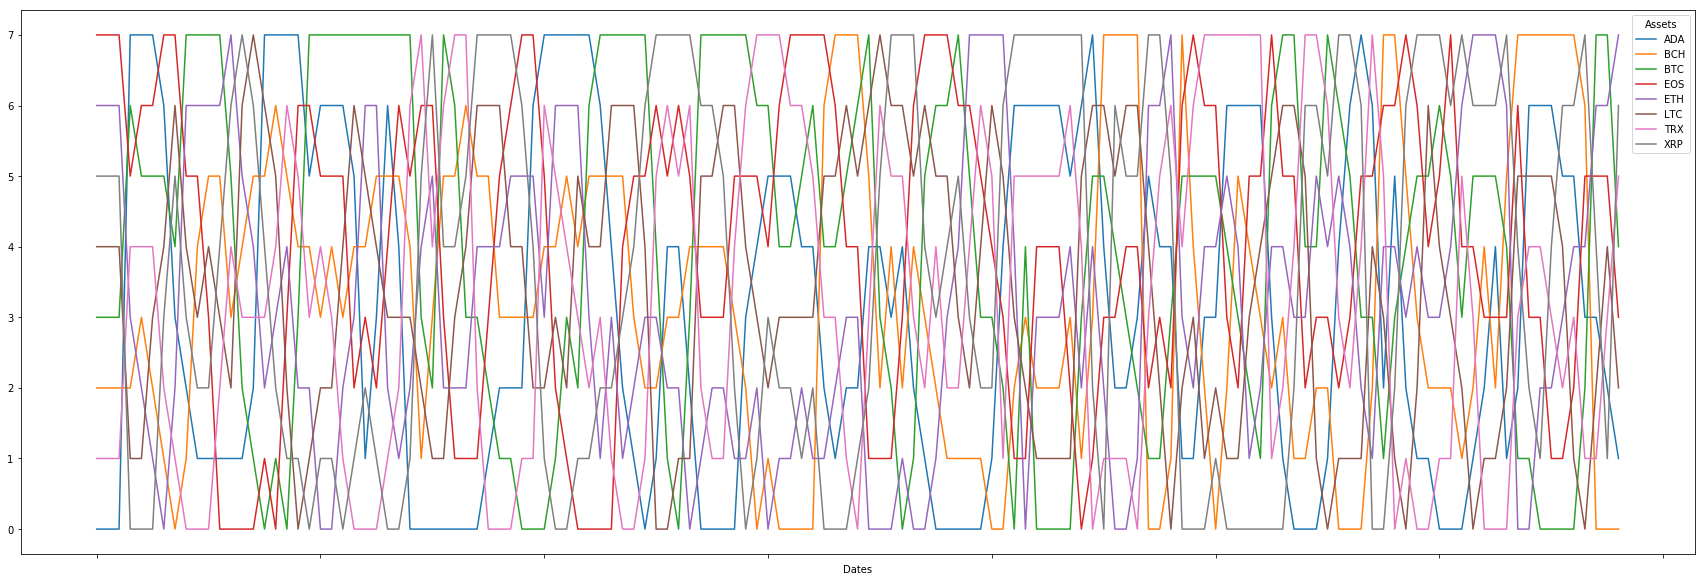

In [102]:
rank_cleaned.plot(figsize=(30, 10))

# 转化rank数据格式的代码写成函数以便后期继续使用

In [98]:
# Example: 
# rank_loc = "C:/Users/workspace/brad_public_workspace_on_win/SH_tongliang/data/"
# rank_file = "11_12_ranks_all.csv"

def clean_rank_data(rank_loc, rank_file):
    rank = pd.read_csv(rank_loc+rank_file, header=None)
    rank.columns = ['Ranks']
    rank['Dates'] = np.nan
    for i, date in enumerate(rank['Ranks']):
        if "-" in rank['Ranks'][i]:
            rank['Dates'][i] = rank['Ranks'][i]
    rank.ffill(inplace=True)
    rank_ = rank[rank['Ranks'] != rank['Dates']]
    rank_['Dates'] = rank_['Dates'].apply(lambda x: x.replace("排名", ""))
    rank_['Assets'], rank_['Rank'] = rank_['Ranks'].str.split(' ', 1).str
    rank_['Rank'] = rank_['Rank'].apply(lambda x: int(x))
    rank_cleaned = pd.pivot_table(rank_, values='Rank', columns='Assets', index = 'Dates')
    return rank_cleaned

# 分析准确率

In [142]:
def print_correction_rate(asst, rank_df, close_res_df):
    rank_asst = rank_df[['date',asst]]
    rank_asst.index = rank_asst['date']
    del rank_asst['date']
    rank_asst.index = pd.to_datetime(rank_asst.index)
    rank_asst['date'] = rank_asst.index.astype(str)
    close_res_df['date'] = close_res_df.index.astype(str)
    merged = rank_asst.merge(close_res_df, on = 'date')
    merged['next_day_pct'] = merged['pct_chg']
    merged.dropna(inplace=True)
    print ("数字货币： ", merged.columns[0])
    print ("检验时间段：",merged['date'].values[0]," to ",merged['date'].values[-1])
    # correct prediction rate:
    try:
        correct_long_prdct = len(merged[((merged[asst] == 7) | (merged[asst] == 6) | (merged[asst] == 5)) &(merged['pct_chg']>0)])/len(merged[((merged[asst] == 7) | (merged[asst] == 6) | (merged[asst] == 5))])
    except ZeroDivisionError:
        print (print ('没有过做多信号'))
    else:
        print ("预测准确率：多头",correct_long_prdct)
    try:    
        correct_short_prdct = len(merged[((merged[asst] == 0) | (merged[asst] == 1) | (merged[asst] == 2)) &(merged['pct_chg']<0)])/len(merged[((merged[asst] == 0) | (merged[asst] == 1) | (merged[asst] == 2))])    
    except ZeroDivisionError:
        print (print ('没有过做空信号'))
    else:      
        print ("预测准确率：空头",correct_short_prdct)

## get rank_df

In [138]:
rank_df = data.copy().rename(columns = {'Dates':'date'})

In [183]:
rank_df_ = rank_df.copy()

In [184]:
rank_df_.index = rank_df_['date']

In [186]:
rank_df_.head()

Assets,date,ADA,BCH,BTC,EOS,ETH,LTC,TRX,XRP
date,,,,,,,,,
2018-06-28,2018-06-28,0,2,3,7,6,4,1,5
2018-06-29,2018-06-29,0,2,3,7,6,4,1,5
2018-06-30,2018-06-30,0,2,3,7,6,4,1,5
2018-07-01,2018-07-01,7,2,6,5,3,1,4,0
2018-07-02,2018-07-02,7,3,5,6,2,1,4,0


In [187]:
# 买多7：
rank_df_[rank_df_==7]

Assets,date,ADA,BCH,BTC,EOS,ETH,LTC,TRX,XRP
date,,,,,,,,,
2018-06-28,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
2018-06-29,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
2018-06-30,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
2018-07-01,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-02,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-03,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-04,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
2018-07-05,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
2018-07-06,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN


In [178]:
rank_df[rank_df[['ADA', 'BCH', 'BTC', 'EOS', 'ETH', 'LTC', 'TRX', 'XRP']] == 0]

Assets,date,ADA,BCH,BTC,EOS,ETH,LTC,TRX,XRP
0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
7,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


## get close_res_df

In [152]:
ada_ = calc_close_pct_chg(ada.copy())
bch_ = calc_close_pct_chg(bch.copy())
btc_ = calc_close_pct_chg(btc.copy())
eos_ = calc_close_pct_chg(eos.copy())
eth_ = calc_close_pct_chg(eth.copy())
ltc_ = calc_close_pct_chg(ltc.copy())
trx_ = calc_close_pct_chg(trx.copy())
xrp_ = calc_close_pct_chg(xrp.copy())

ada_reset = ada_.copy()
bch_reset = bch_.copy()
btc_reset = btc_.copy()
eos_reset = eos_.copy()
eth_reset = eth_.copy()
ltc_reset = ltc_.copy()
trx_reset = trx_.copy()
xrp_reset = xrp_.copy()

del ada_reset['time']
del bch_reset['time']
del btc_reset['time']
del eos_reset['time']
del eth_reset['time']
del ltc_reset['time']
del trx_reset['time']
del xrp_reset['time']

ada_reset.reset_index(inplace=True)
bch_reset.reset_index(inplace=True)
btc_reset.reset_index(inplace=True)
eos_reset.reset_index(inplace=True)
eth_reset.reset_index(inplace=True)
ltc_reset.reset_index(inplace=True)
trx_reset.reset_index(inplace=True)
xrp_reset.reset_index(inplace=True)

ada_reset = ada_reset[['time', 'close', 'pct_chg']]
bch_reset = bch_reset[['time', 'close', 'pct_chg']]
btc_reset = btc_reset[['time', 'close', 'pct_chg']]
eos_reset = eos_reset[['time', 'close', 'pct_chg']]
eth_reset = eth_reset[['time', 'close', 'pct_chg']]
ltc_reset = ltc_reset[['time', 'close', 'pct_chg']]
trx_reset = trx_reset[['time', 'close', 'pct_chg']]
xrp_reset = xrp_reset[['time', 'close', 'pct_chg']]

ada_reset = ada_reset.rename(columns={'time': 'date'})
bch_reset = bch_reset.rename(columns={'time': 'date'})
btc_reset = btc_reset.rename(columns={'time': 'date'})
eos_reset = eos_reset.rename(columns={'time': 'date'})
eth_reset = eth_reset.rename(columns={'time': 'date'})
ltc_reset = ltc_reset.rename(columns={'time': 'date'})
trx_reset = trx_reset.rename(columns={'time': 'date'})
xrp_reset = xrp_reset.rename(columns={'time': 'date'})

ada_reset['date'] = ada_reset['date'].apply(lambda x: x[:10])
bch_reset['date'] = bch_reset['date'].apply(lambda x: x[:10])
btc_reset['date'] = btc_reset['date'].apply(lambda x: x[:10])
eos_reset['date'] = eos_reset['date'].apply(lambda x: x[:10])
eth_reset['date'] = eth_reset['date'].apply(lambda x: x[:10])
ltc_reset['date'] = ltc_reset['date'].apply(lambda x: x[:10])
trx_reset['date'] = trx_reset['date'].apply(lambda x: x[:10])
xrp_reset['date'] = xrp_reset['date'].apply(lambda x: x[:10])

In [154]:
eth_reset.head()

,date,close,pct_chg
0,2018-06-19,799.9,NaN
1,2018-06-20,801.2,0.001625
2,2018-06-21,787.9,-0.016600
3,2018-06-22,762.4,-0.032365
4,2018-06-23,772.4,0.013116


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136], dtype=int64),
 array([1, 1, 1, 8, 8, 8, 5, 2, 7, 7, 7, 4, 4, 4, 4, 3, 4, 3, 6, 8, 5, 5,
        8, 7, 7, 7, 8, 8, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 3, 3, 3, 8, 8, 4,
        4, 4, 4, 7, 7, 1, 6, 6, 3, 5, 1, 1, 1, 1, 8, 2, 5, 2, 2,

In [161]:
rank_asst = rank_df[['date','ETH']]
rank_asst.index = rank_asst['date']
del rank_asst['date']
eth_reset.index = pd.to_datetime(eth_reset.date)
rank_asst.index = pd.to_datetime(rank_asst.index)
rank_asst['date'] = rank_asst.index.astype(str)
eth_reset['date'] = eth_reset.index.astype(str)
merged = rank_asst.merge(eth_reset, on = 'date')
merged['next_day_pct'] = merged['pct_chg'].shift(-1)
merged.dropna(inplace=True)

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


In [164]:
def print_correction_rate(asst, rank_df, close_res_df):

    rank_asst = rank_df[['date',asst]]
    rank_asst.index = rank_asst['date']
    del rank_asst['date']
    close_res_df.index = pd.to_datetime(close_res_df.date)
    rank_asst.index = pd.to_datetime(rank_asst.index)
    rank_asst['date'] = rank_asst.index.astype(str)
    close_res_df['date'] = close_res_df.index.astype(str)
    merged = rank_asst.merge(close_res_df, on = 'date')
    merged['next_day_pct'] = merged['pct_chg'].shift(-1)
    merged.dropna(inplace=True)
    print ("数字货币： ", merged.columns[0])
    print ("检验时间段：",merged['date'].values[0]," to ",merged['date'].values[-1])
    # correct prediction rate:
    try:
        correct_long_prdct = len(merged[((merged[asst] == 7) | (merged[asst] == 6) | (merged[asst] == 5)) &(merged['pct_chg']>0)])/len(merged[((merged[asst] == 7) | (merged[asst] == 6) | (merged[asst] == 5))])
    except ZeroDivisionError:
        print (print ('没有过做多信号'))
    else:
        print ("预测准确率：多头",correct_long_prdct)
    try:    
        correct_short_prdct = len(merged[((merged[asst] == 0) | (merged[asst] == 1) | (merged[asst] == 2)) &(merged['pct_chg']<0)])/len(merged[((merged[asst] == 0) | (merged[asst] == 1) | (merged[asst] == 2))])    
    except ZeroDivisionError:
        print (print ('没有过做空信号'))
    else:      
        print ("预测准确率：空头",correct_short_prdct)

In [167]:
print_correction_rate('ETH', rank_df, eth_reset)
print ("="*60)
print_correction_rate('BCH', rank_df, bch_reset)
print ("="*60)
print_correction_rate('ADA', rank_df, ada_reset)
print ("="*60)
print_correction_rate('EOS', rank_df, eos_reset)
print ("="*60)
print_correction_rate('LTC', rank_df, ltc_reset)
print ("="*60)
print_correction_rate('BTC', rank_df, btc_reset)
print ("="*60)
# 没有交易信号
print_correction_rate('TRX', rank_df, trx_reset)
print ("="*60)
print_correction_rate('XRP', rank_df, xrp_reset)
print ("="*60)

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  # Remove the CWD from sys.path while we load stuff.


数字货币：  ETH
检验时间段： 2018-06-28  to  2018-11-10
预测准确率：多头 0.5142857142857142
预测准确率：空头 0.6666666666666666
数字货币：  BCH
检验时间段： 2018-06-28  to  2018-11-10
预测准确率：多头 0.43902439024390244
预测准确率：空头 0.4909090909090909
数字货币：  ADA
检验时间段： 2018-06-28  to  2018-11-10
预测准确率：多头 0.6304347826086957
预测准确率：空头 0.546875
数字货币：  EOS
检验时间段： 2018-06-28  to  2018-11-10
预测准确率：多头 0.5223880597014925
预测准确率：空头 0.696969696969697
数字货币：  LTC
检验时间段： 2018-06-28  to  2018-11-10
预测准确率：多头 0.40425531914893614
预测准确率：空头 0.5625
数字货币：  BTC
检验时间段： 2018-06-28  to  2018-11-10
预测准确率：多头 0.5538461538461539
预测准确率：空头 0.5789473684210527
数字货币：  TRX
检验时间段： 2018-06-28  to  2018-11-10
预测准确率：多头 0.5434782608695652
预测准确率：空头 0.5818181818181818
数字货币：  XRP
检验时间段： 2018-06-28  to  2018-11-10
预测准确率：多头 0.5245901639344263
预测准确率：空头 0.6379310344827587
